In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [32]:
data = pd.read_csv('student.csv')
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
data.race_ethnicity.value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [14]:
data.parental_level_of_education.value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [33]:
cat_features = data.select_dtypes(include=object).columns.tolist()
num_features = data.select_dtypes(include=int)
cat_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [35]:
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data[cat_features])

In [37]:
one_hot_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_features))
one_hot_df

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [81]:
data_encoded = pd.concat([one_hot_df, num_features], axis = 1)
data_encoded

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none,math_score,reading_score,writing_score
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,72,72,74
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,69,90,88
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,90,95,93
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,47,57,44
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,88,99,95
996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,62,55,55
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,59,71,65
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,68,78,77


In [82]:
data_encoded['total_score'] = data_encoded['math_score']+data_encoded['reading_score']+data_encoded['writing_score']
data_encoded['avg_score'] = data_encoded['total_score']/3
data_encoded

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,...,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none,math_score,reading_score,writing_score,total_score,avg_score
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,72,72,74,218,72.666667
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,69,90,88,247,82.333333
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,90,95,93,278,92.666667
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,47,57,44,148,49.333333
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,88,99,95,282,94.000000
996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,62,55,55,172,57.333333
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,59,71,65,195,65.000000
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,68,78,77,223,74.333333


In [83]:
target = data_encoded['math_score']
data_encoded.drop('math_score', axis = 1, inplace = True)

In [84]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_encoded_scaled = ss.fit_transform(data_encoded)

In [86]:
data_encoded_scaled_df = pd.DataFrame(data_encoded_scaled, columns=data_encoded.columns)
data_encoded_scaled_df

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,...,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none,reading_score,writing_score,total_score,avg_score
0,0.964625,-0.964625,-0.312562,2.064742,-0.684419,-0.595830,-0.403473,-0.534179,2.733967,-0.493742,...,-0.540361,-0.466933,-0.741881,0.741881,-0.746748,0.746748,0.193999,0.391492,0.343574,0.343574
1,0.964625,-0.964625,-0.312562,-0.484322,1.461094,-0.595830,-0.403473,-0.534179,-0.365769,-0.493742,...,1.850616,-0.466933,-0.741881,0.741881,1.339140,-1.339140,1.427476,1.313269,1.021927,1.021927
2,0.964625,-0.964625,-0.312562,2.064742,-0.684419,-0.595830,-0.403473,-0.534179,-0.365769,-0.493742,...,-0.540361,-0.466933,-0.741881,0.741881,-0.746748,0.746748,1.770109,1.642475,1.747064,1.747064
3,-1.036672,1.036672,3.199368,-0.484322,-0.684419,-0.595830,-0.403473,1.872032,-0.365769,-0.493742,...,-0.540361,-0.466933,1.347925,-1.347925,-0.746748,0.746748,-0.833899,-1.583744,-1.293830,-1.293830
4,-1.036672,1.036672,-0.312562,-0.484322,1.461094,-0.595830,-0.403473,-0.534179,-0.365769,-0.493742,...,1.850616,-0.466933,-0.741881,0.741881,-0.746748,0.746748,0.605158,0.457333,0.600881,0.600881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.964625,-0.964625,-0.312562,-0.484322,-0.684419,-0.595830,2.478479,-0.534179,-0.365769,-0.493742,...,-0.540361,-0.466933,-0.741881,0.741881,1.339140,-1.339140,2.044215,1.774157,1.840630,1.840630
996,-1.036672,1.036672,-0.312562,-0.484322,1.461094,-0.595830,-0.403473,-0.534179,-0.365769,2.025350,...,-0.540361,-0.466933,1.347925,-1.347925,-0.746748,0.746748,-0.970952,-0.859491,-0.732434,-0.732434
997,0.964625,-0.964625,-0.312562,-0.484322,1.461094,-0.595830,-0.403473,-0.534179,-0.365769,2.025350,...,-0.540361,-0.466933,1.347925,-1.347925,1.339140,-1.339140,0.125472,-0.201079,-0.194430,-0.194430
998,0.964625,-0.964625,-0.312562,-0.484322,-0.684419,1.678331,-0.403473,-0.534179,-0.365769,-0.493742,...,1.850616,-0.466933,-0.741881,0.741881,1.339140,-1.339140,0.605158,0.589015,0.460532,0.460532


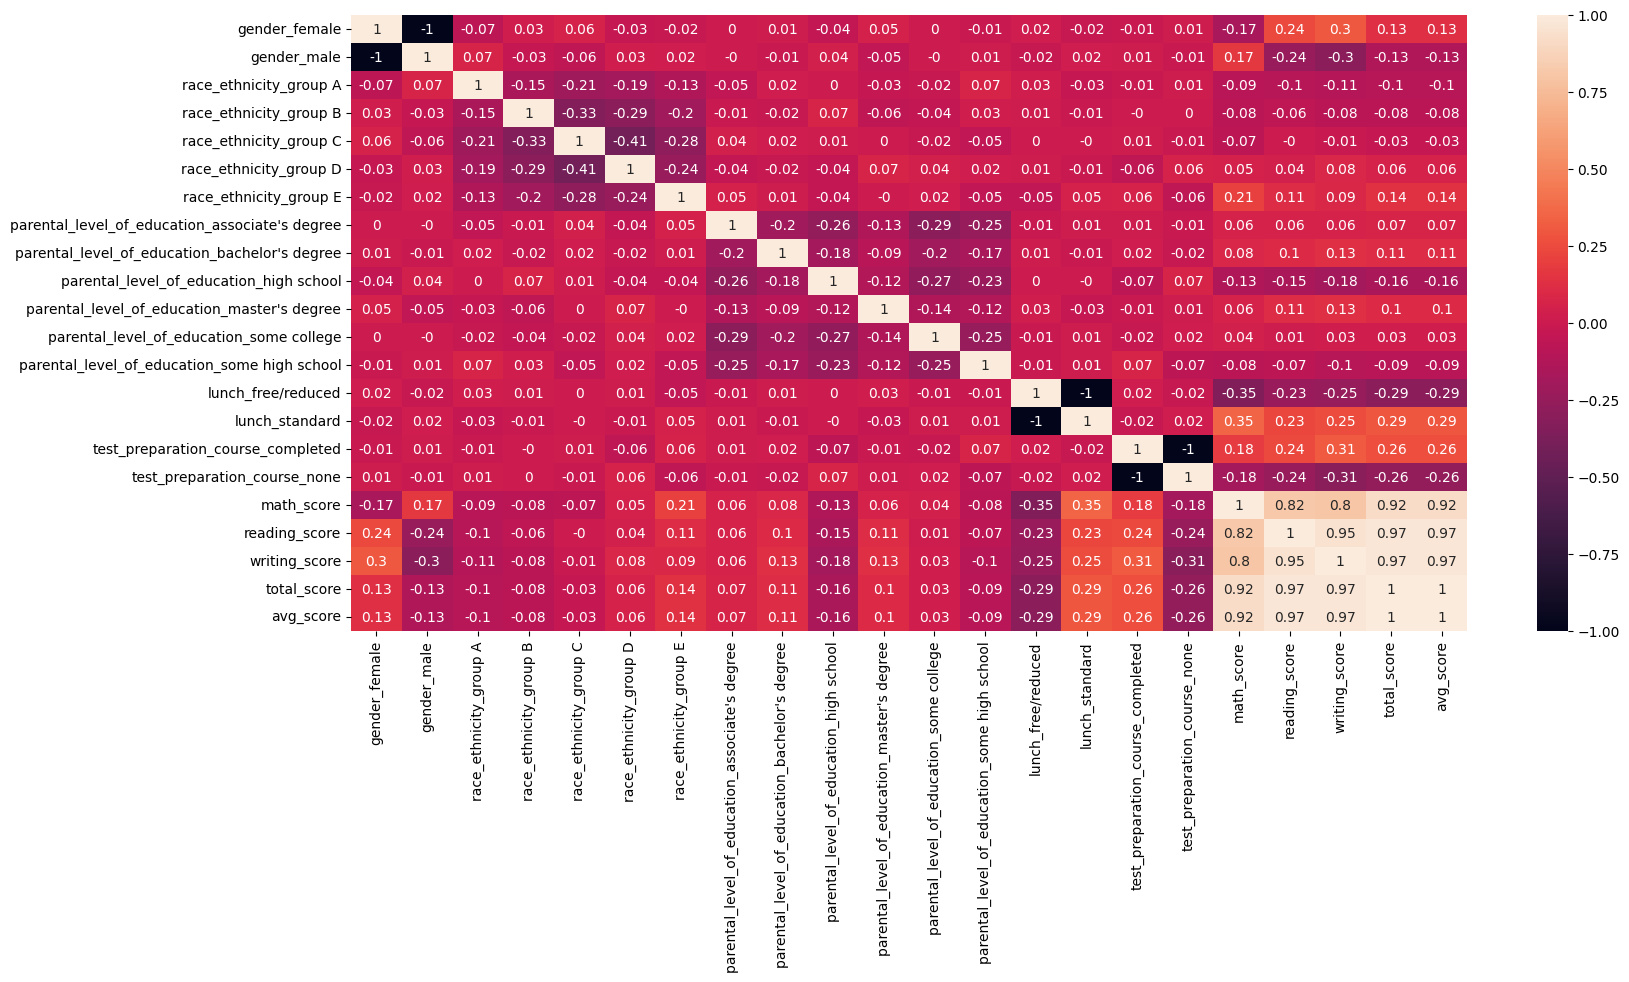

In [52]:
cor_mat = round(data_encoded_scaled_df.corr(),2)
plt.figure(figsize=(18,8))
sns.heatmap(cor_mat, annot = True)
plt.show()

In [87]:
data_encoded_scaled_df_refined = data_encoded_scaled_df.drop(['race_ethnicity_group A','race_ethnicity_group B','race_ethnicity_group C', 'race_ethnicity_group D', "parental_level_of_education_associate's degree", "parental_level_of_education_bachelor's degree", "parental_level_of_education_master's degree", "parental_level_of_education_some college", "parental_level_of_education_some high school"], axis = 1)
data_encoded_scaled_df_refined

,gender_female,gender_male,race_ethnicity_group E,parental_level_of_education_high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none,reading_score,writing_score,total_score,avg_score
0,0.964625,-0.964625,-0.403473,-0.493742,-0.741881,0.741881,-0.746748,0.746748,0.193999,0.391492,0.343574,0.343574
1,0.964625,-0.964625,-0.403473,-0.493742,-0.741881,0.741881,1.339140,-1.339140,1.427476,1.313269,1.021927,1.021927
2,0.964625,-0.964625,-0.403473,-0.493742,-0.741881,0.741881,-0.746748,0.746748,1.770109,1.642475,1.747064,1.747064
3,-1.036672,1.036672,-0.403473,-0.493742,1.347925,-1.347925,-0.746748,0.746748,-0.833899,-1.583744,-1.293830,-1.293830
4,-1.036672,1.036672,-0.403473,-0.493742,-0.741881,0.741881,-0.746748,0.746748,0.605158,0.457333,0.600881,0.600881
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.964625,-0.964625,2.478479,-0.493742,-0.741881,0.741881,1.339140,-1.339140,2.044215,1.774157,1.840630,1.840630
996,-1.036672,1.036672,-0.403473,2.025350,1.347925,-1.347925,-0.746748,0.746748,-0.970952,-0.859491,-0.732434,-0.732434
997,0.964625,-0.964625,-0.403473,2.025350,1.347925,-1.347925,1.339140,-1.339140,0.125472,-0.201079,-0.194430,-0.194430
998,0.964625,-0.964625,-0.403473,-0.493742,-0.741881,0.741881,1.339140,-1.339140,0.605158,0.589015,0.460532,0.460532


In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_encoded_scaled_df_refined, target, random_state=42)

In [91]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
model_lr_pred = model_lr.predict(x_test)
rmse = mean_squared_error(model_lr_pred, y_test, squared=False)
print(rmse)

1.720041842206428e-14


c:\Users\Bhavya Prakash\OneDrive\Desktop\Models Deployment\end to end ML project with deployment and MLOps\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [116]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(max_depth=16)
model_tree.fit(x_train, y_train)
model_tree_pred = model_tree.predict(x_test)
rmse = mean_squared_error(model_tree_pred, y_test, squared=False)
print(rmse)

4.038261452104798


c:\Users\Bhavya Prakash\OneDrive\Desktop\Models Deployment\end to end ML project with deployment and MLOps\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [4]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators = 100)
model_rf.fit(x_train, y_train)
model_rf_pred = model_rf.predict(x_test)
rmse = mean_squared_error(model_rf_pred, y_test, squared=False)
print(rmse)